# This notebook showcases the easiest ways to work with data in your `Dataset`.

## Also, refer to [03 - Creating a Dataset from Raw, DataFrame, GeoDataFrame.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/03%20-%20Creating%20a%20Dataset%20from%20Raw%2C%20DataFrame%2C%20GeoDataFrame.ipynb) and [05 - Opening an Existing Dataset.ipynb](https://github.com/derekeden/trackio/blob/main/notebooks/05%20-%20Opening%20an%20Existing%20Dataset.ipynb) for tips on how to create a `Dataset`.
___

In [9]:
import trackio as tio
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import geopandas as gp
import pandas as pd
import numpy as np

___
## Reading a specific agent

In [10]:
#create the Dataset
ds = tio.read(data_path='example00')

In [11]:
#get agent id
agent_id = ds.agents.index[0]

#get specific agent
agent = ds.get_agent(agent_id)

agent

___
## Reading a series of agents

In [12]:
#get agent ids
agent_ids = ds.agents.index[:100]

#get agents
agents = ds.get_agents(agent_ids, ncores=4)

len(agents), agents[0]

Getting agents: 100%|██████████| 100/100 [00:00<00:00, 33330.45it/s]

(100, <trackio.Agent.Agent at 0x20183379cc0>)

___
## Reading a specific track

In [13]:
#get track id
track_id = ds.tracks.index[0]

#get specific agent
track = ds.get_track(track_id)

track.head(5)

,Time,X,Y,Coursing,Speed
0,2021-01-01 22:11:00,-8.242202e+06,4.954217e+06,342.060938,6.000000
1,2021-01-01 22:12:00,-8.242285e+06,4.954447e+06,341.000000,6.182759
2,2021-01-01 22:13:00,-8.242370e+06,4.954684e+06,341.028889,6.444444
3,2021-01-01 22:14:00,-8.242457e+06,4.954933e+06,341.095556,6.777778
4,2021-01-01 22:15:00,-8.242548e+06,4.955189e+06,340.824590,6.800000


___
## Reading a series of tracks

In [14]:
#get track ids
track_ids = ds.tracks.index[:100]

#get agents
tracks = ds.get_tracks(track_ids, ncores=4)

len(tracks), tracks[0].head(5)

Getting tracks: 100%|██████████| 100/100 [00:00<00:00, 50009.59it/s]


(100,
                  Time             X             Y    Coursing     Speed
 0 2021-01-01 22:11:00 -8.242202e+06  4.954217e+06  342.060938  6.000000
 1 2021-01-01 22:12:00 -8.242285e+06  4.954447e+06  341.000000  6.182759
 2 2021-01-01 22:13:00 -8.242370e+06  4.954684e+06  341.028889  6.444444
 3 2021-01-01 22:14:00 -8.242457e+06  4.954933e+06  341.095556  6.777778
 4 2021-01-01 22:15:00 -8.242548e+06  4.955189e+06  340.824590  6.800000)

___
## Converting to DataFrame

In [15]:
#convert to dataframe
df = ds.to_df(tracks=track_ids,
              ncores=4)

df.head(5)

Converting tracks to DataFrame:   0%|          | 0/100 [00:00<?, ?it/s]

Converting tracks to DataFrame: 100%|██████████| 100/100 [00:02<00:00, 46.00it/s]


,Time,X,Y,Coursing,Speed,Track ID,MMSI,Agent ID,Distance Travelled,Radius of Curvature,Sinuosity,Acceleration,Characteristic
Vessel_248290000_T0_P0,2021-01-01 00:20:00,-8.237877e+06,4.967661e+06,136.584916,0.0,Vessel_248290000_T0,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P1,2021-01-01 00:21:00,-8.237877e+06,4.967661e+06,205.534637,0.0,Vessel_248290000_T0,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P2,2021-01-01 00:22:00,-8.237877e+06,4.967662e+06,274.484358,0.0,Vessel_248290000_T0,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P3,2021-01-01 00:23:00,-8.237877e+06,4.967662e+06,325.148066,0.0,Vessel_248290000_T0,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P4,2021-01-01 00:24:00,-8.237877e+06,4.967661e+06,336.352486,0.0,Vessel_248290000_T0,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN


___
## Converting to GeoDataFrame

This method has two ways of returning output. It can either return 1 LineString for each track, or N LineStrings for each track with N segments.

Additionally, you can specify a `code` integer value to return only portions of tracks with that `code` value as `True`. For the first output method, this would return 1 MultiLineString.

Converting tracks to GeoDataFrame: 100%|██████████| 100/100 [00:02<00:00, 43.40it/s]


<Axes: >

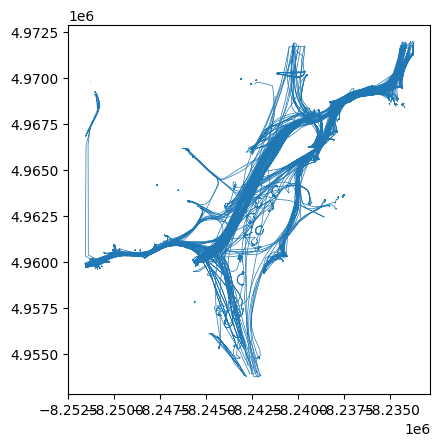

In [24]:
#convert to gdf
gdf1 = ds.to_gdf(tracks=track_ids, 
                ncores=4)

gdf1.plot(linewidth=0.5)

In [ ]:
#convert to gdf, segment return mode
gdf2 = ds.to_gdf(tracks=track_ids, 
                ncores=4,
                segments=True)

<Axes: >

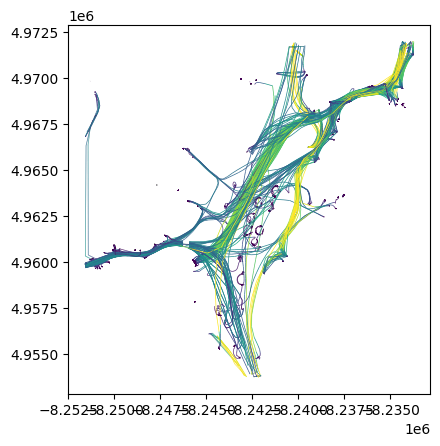

In [22]:
#plot the segments
gdf2.plot(linewidth=0.5, column='Speed', vmin=0, vmax=20)

___
## Rasterizing Track Counts

This method uses the GDAL rasterize function to burn track counts into background rasters. A track is counted in a given pixel if any part of that track touches the pixel. The same track crossing over the same pixel can result in multiple counts.

In [56]:
#save the gdf to use it for rasterizing
gdf_file = 'files/gdf.gpkg'
gdf2[['Speed','geometry']].to_file(gdf_file)

In [57]:
#define blank raster output file
blank_file = 'files/blank.tif'

#get bounds of dataset
x0, y0, x1, y1 = ds.agents.total_bounds

#create blank zero raster
tio.create_blank_raster(blank_file,
                        ds.meta['CRS'],
                        grid={'x0': x0,
                              'y0': y0,
                              'nx': int((x1-x0)/100),
                              'ny': int((y1-y0)/100),
                              'dx': 100,
                              'dy': 100})

Raster created and saved to files/blank.tif!


In [58]:
#define output file
count_file = 'files/track_counts.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, count_file)

Track Counts written to c:\code\trackio\notebooks\files\track_counts.tif


<Axes: >

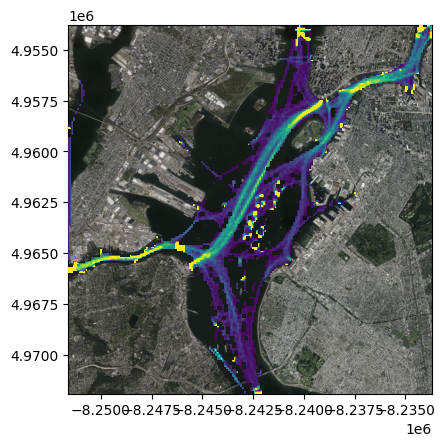

In [61]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
count = rio.open(count_file, 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(count, ax=ax, zorder=10, vmin=0, vmax=50, origin='lower')

___
## Rasterizing Track Attributes

This can be used to rasterize dynamic attributes (i.e. Speed, Duration, etc.) along tracks into a background raster. This can be useful for making spatial maps of average values, like mean speed or the average dimension of vessels passing over a given area. Or, it can be used to approximate the amount of time spent in each pixel.

In [62]:
#define output file
speed_file = 'files/track_speeds.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, speed_file, attribute='Speed')

Track Speed written to c:\code\trackio\notebooks\files\track_speeds.tif


In [64]:
#make a mean speed raster
count = rio.open(count_file, 'r')
speed = rio.open(speed_file, 'r')
with rio.open('files/mean_speed.tif', 'w', **count.profile) as f:
    f.write(speed.read(1)/count.read(1), 1)

<Axes: >

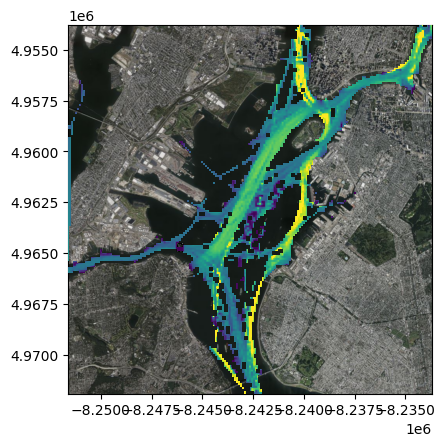

In [66]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
mean_speed = rio.open('files/mean_speed.tif', 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(mean_speed, ax=ax, zorder=10, vmin=0, vmax=20, origin='lower')

___
## Converting to Dask Bag

This method is used to convert the `Dataset` to a dask bag. Each element in the bag is a `trackio.Agent` object from the `Datset`.

This allows you to do whatever operations you want on the data, while leveraging Dask's parallel optimization capabilities. It's great for extending custom functionality.

In [67]:
#convert to dask bag
bag = ds.to_dask_bag()

In [77]:
#calculate max speed at each track
def grab_max_track_speed(agent):
    for tid in agent.tracks.keys():
        track = agent.tracks[tid]
        track_id = agent.agent_meta['Tracks'][tid]['Track ID']
        max_speed = track['Speed'].max()
    return track_id, max_speed

results = bag.map(grab_max_track_speed).compute()

pd.DataFrame(results)

,0,1
0,Vessel_248290000_T0,8.652334
1,Vessel_309987000_T0,47.144477
2,Vessel_338073000_T0,294.160719
3,Vessel_338093826_T0,4.842190
4,Vessel_338295000_T0,177.631144
...,...,...
158,Vessel_566855000_T0,199.547298
159,Vessel_636013689_T0,284.871347
160,Vessel_636015050_T0,0.100807
161,Vessel_636015514_T0,0.093611


In [105]:
t.iloc[30:50]

,Time,X,Y,Coursing,Speed
30,2021-01-01 00:48:00.000000000,-8.243761e+06,4.958466e+06,353.485714,5.900467
31,2021-01-01 00:49:00.000000000,-8.243815e+06,4.958808e+06,349.339130,5.909454
32,2021-01-01 00:50:00.000000000,-8.243892e+06,4.959163e+06,345.972857,6.190152
33,2021-01-01 00:51:00.000000000,-8.243994e+06,4.959529e+06,341.226761,6.413740
34,2021-01-01 00:52:00.000000000,-8.244141e+06,4.959889e+06,332.955072,6.682685
35,2021-01-01 00:53:00.000000000,-8.244357e+06,4.960241e+06,319.973437,6.781710
36,2021-01-01 00:54:00.000000000,-8.244663e+06,4.960500e+06,300.379687,6.369667
37,2021-01-01 00:55:00.000000000,-8.244999e+06,4.960639e+06,287.659701,5.845934
38,2021-01-01 00:56:00.000000000,-8.245325e+06,4.960731e+06,284.513043,5.479589
39,2021-01-01 00:57:00.000000000,-8.245634e+06,4.960809e+06,283.869014,294.160719


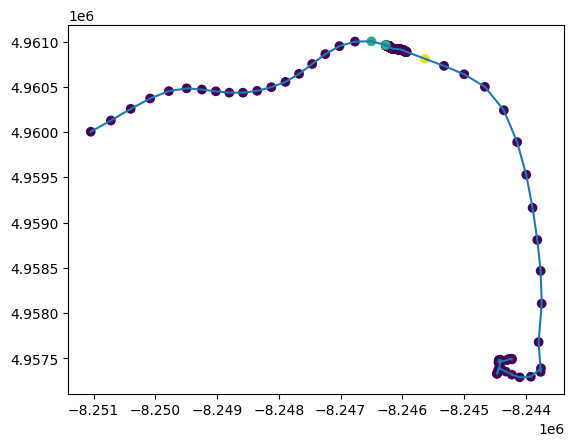

In [84]:
t = ds.get_track('Vessel_338073000_T0')
plt.plot(t['X'], t['Y'])
plt.scatter(t['X'], t['Y'], c=t['Speed'], vmin=100, vmax=300)